# Pokemon Classification through Supervised Machine Learning

This notebook provides an interactive environment for exploring the Pokemon dataset and running machine learning models for legendary classification.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Data Loading](#loading)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#features)
5. [Model Training](#training)
6. [Results Analysis](#results)

## 1. Setup and Imports {#setup}

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from pathlib import Path

# Suppress warnings for cleaner output
warnings.simplefilter(action="ignore")

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [2]:
# Import custom modules
import sys
sys.path.append('../src')

from eda import DataExplorer
from feature_engineering import FeatureEngineer
from model_trainer import ModelTrainer
from main import run_pokemon_analysis

## 2. Data Loading {#loading}

In [3]:
# Load the Pokemon dataset
data_path = "../data/Pokemon.csv"

try:
    df_raw = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df_raw.shape}")
    print(f"Columns: {list(df_raw.columns)}")
except FileNotFoundError:
    print(f"File not found: {data_path}")
    print("Please ensure Pokemon.csv is in the data/ directory")

Dataset loaded successfully!
Shape: (800, 13)
Columns: ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [4]:
# Quick data preview
display(df_raw.head())
print("\nData Info:")
df_raw.info()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## 3. Exploratory Data Analysis {#eda}

2025-07-23 02:15:19,662 - INFO - Starting comprehensive data exploration


DATAFRAME OVERVIEW
Shape: (800, 13)
Memory Usage: 0.19 MB

Column Data Types:
#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool

Missing Values:
Type 2    386


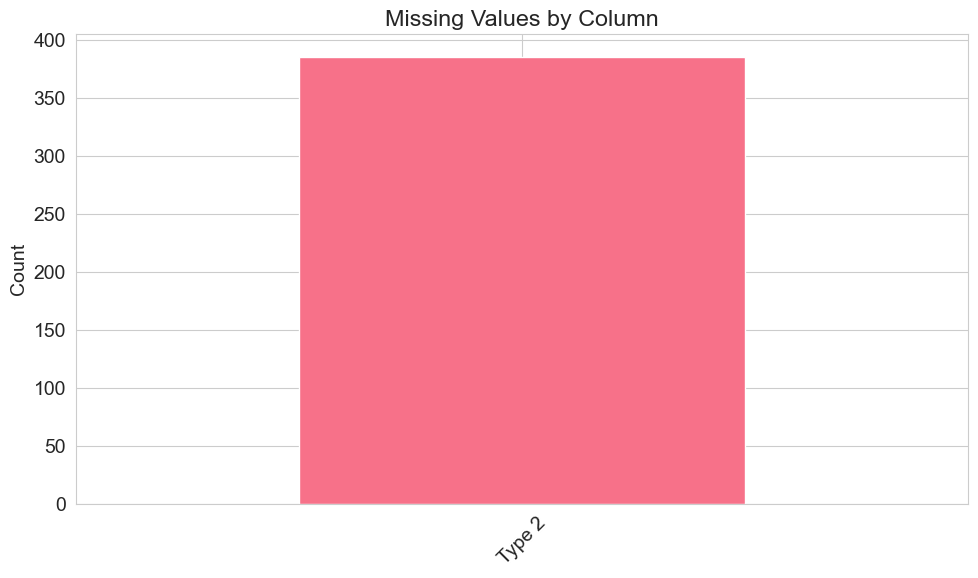


Numerical Statistics:
            #   Total      HP  Attack  Defense  Sp. Atk  Sp. Def   Speed  Generation
count  800.00  800.00  800.00  800.00   800.00   800.00   800.00  800.00      800.00
mean   362.81  435.10   69.26   79.00    73.84    72.82    71.90   68.28        3.32
std    208.34  119.96   25.53   32.46    31.18    32.72    27.83   29.06        1.66
min      1.00  180.00    1.00    5.00     5.00    10.00    20.00    5.00        1.00
25%    184.75  330.00   50.00   55.00    50.00    49.75    50.00   45.00        2.00
50%    364.50  450.00   65.00   75.00    70.00    65.00    70.00   65.00        3.00
75%    539.25  515.00   80.00  100.00    90.00    95.00    90.00   90.00        5.00
max    721.00  780.00  255.00  190.00   230.00   194.00   230.00  180.00        6.00

==================== TARGET ANALYSIS ====================
Target Variable: Legendary

Target Distribution:
Legendary
False    735
True      65


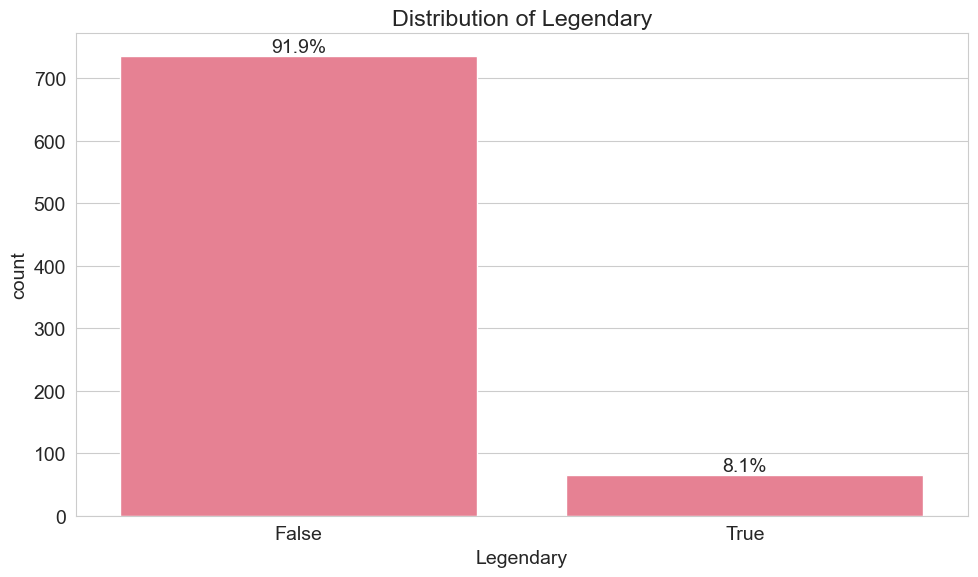


==================== CORRELATION ANALYSIS ====================


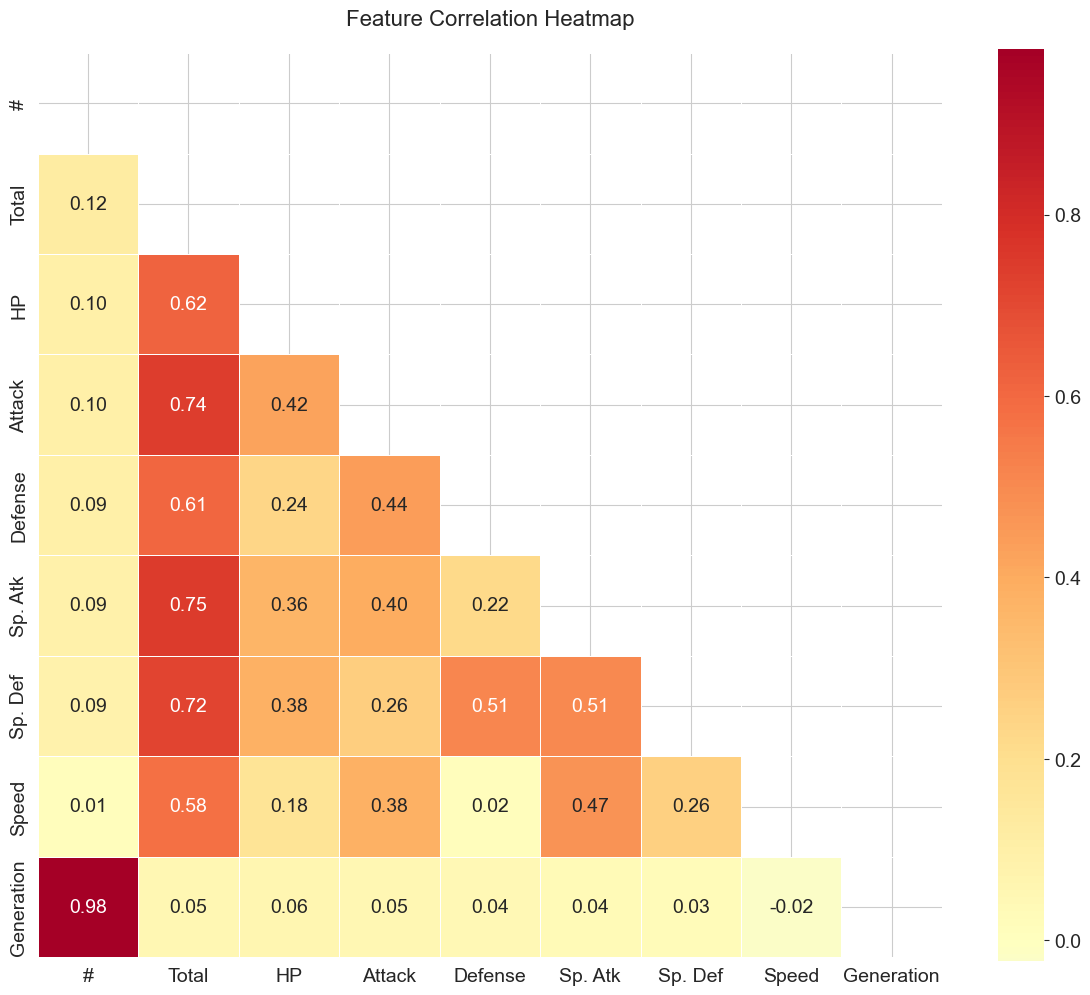


==================== FEATURE DISTRIBUTIONS ====================


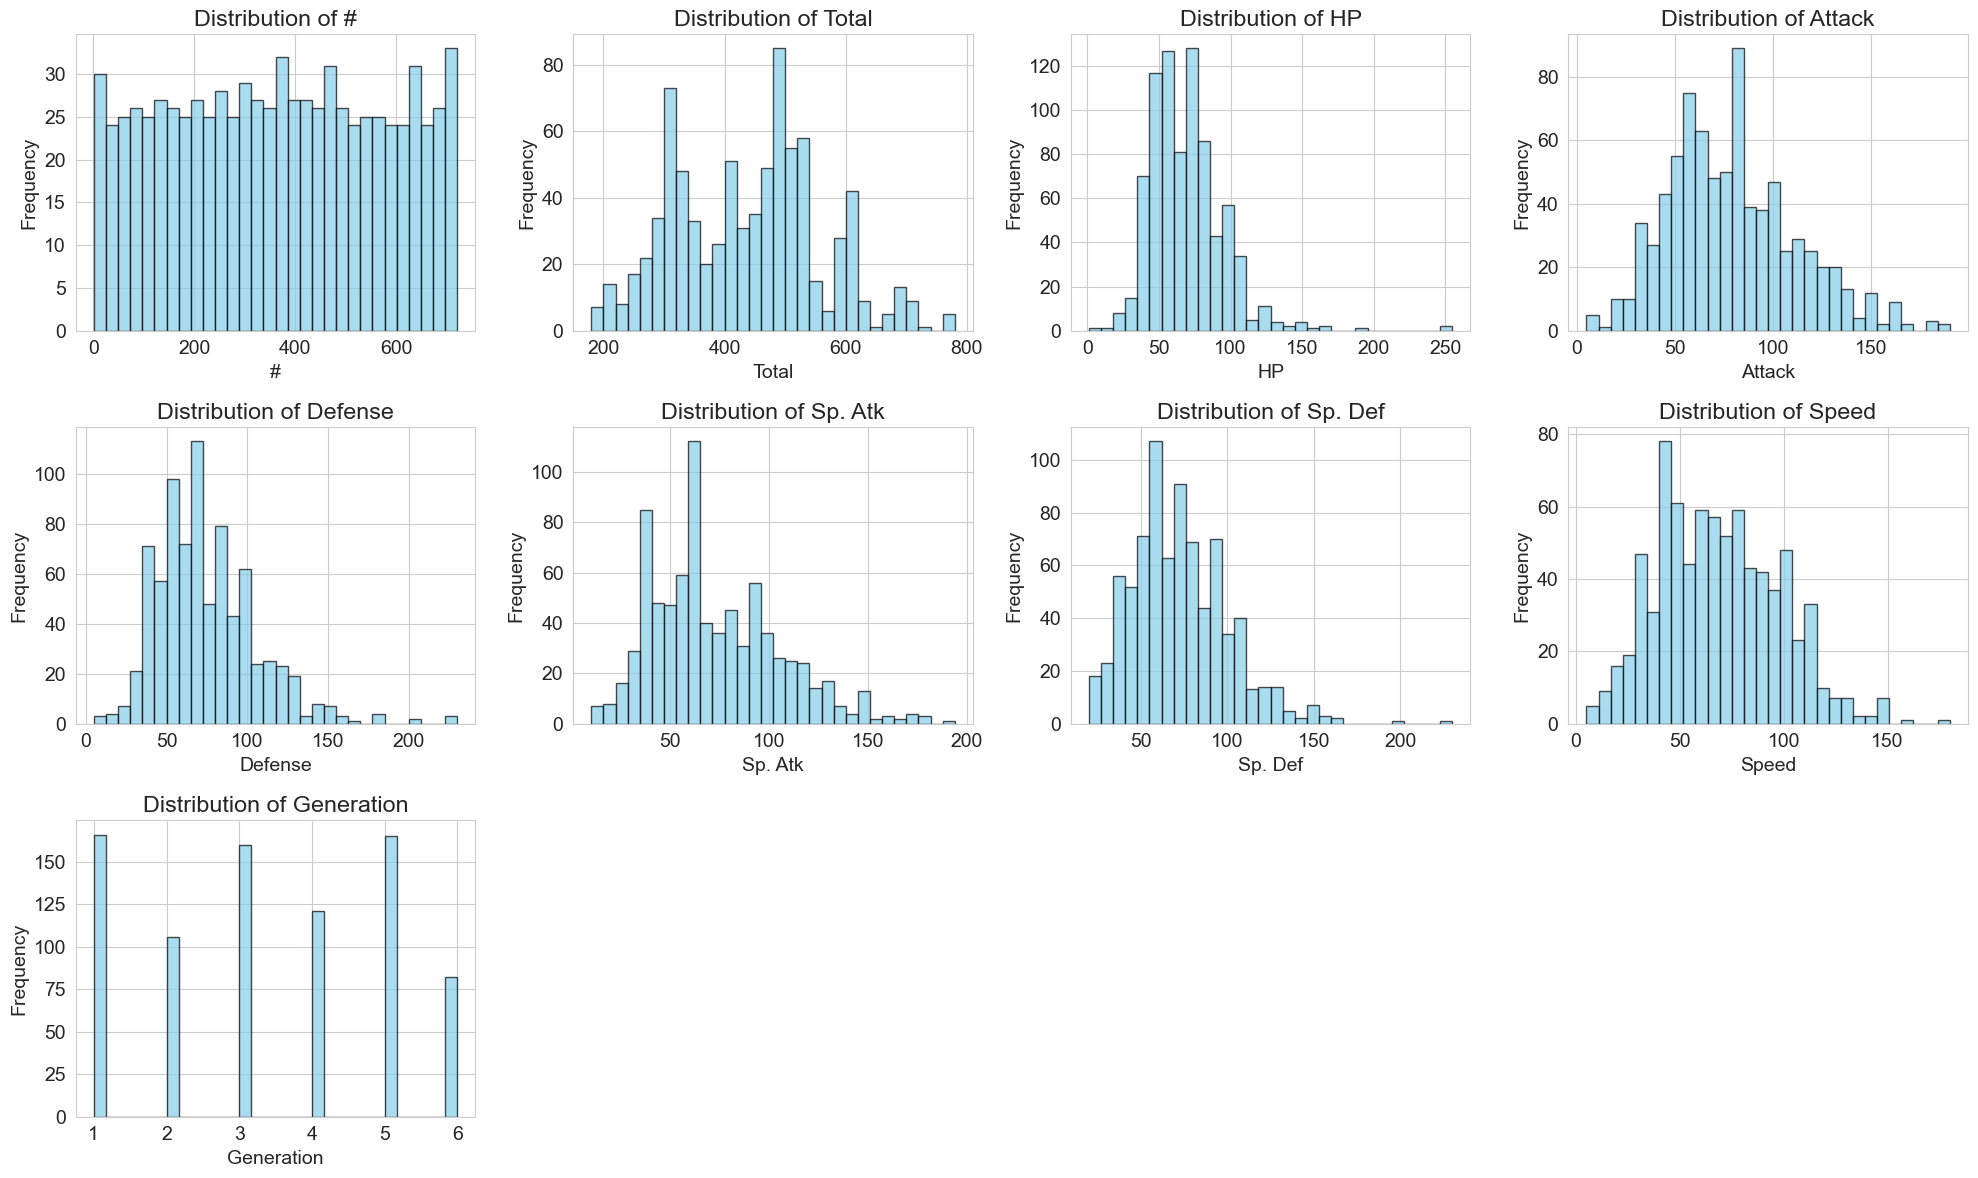


==================== CATEGORICAL FEATURES ====================

Type 1 - Unique Values: 18
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32


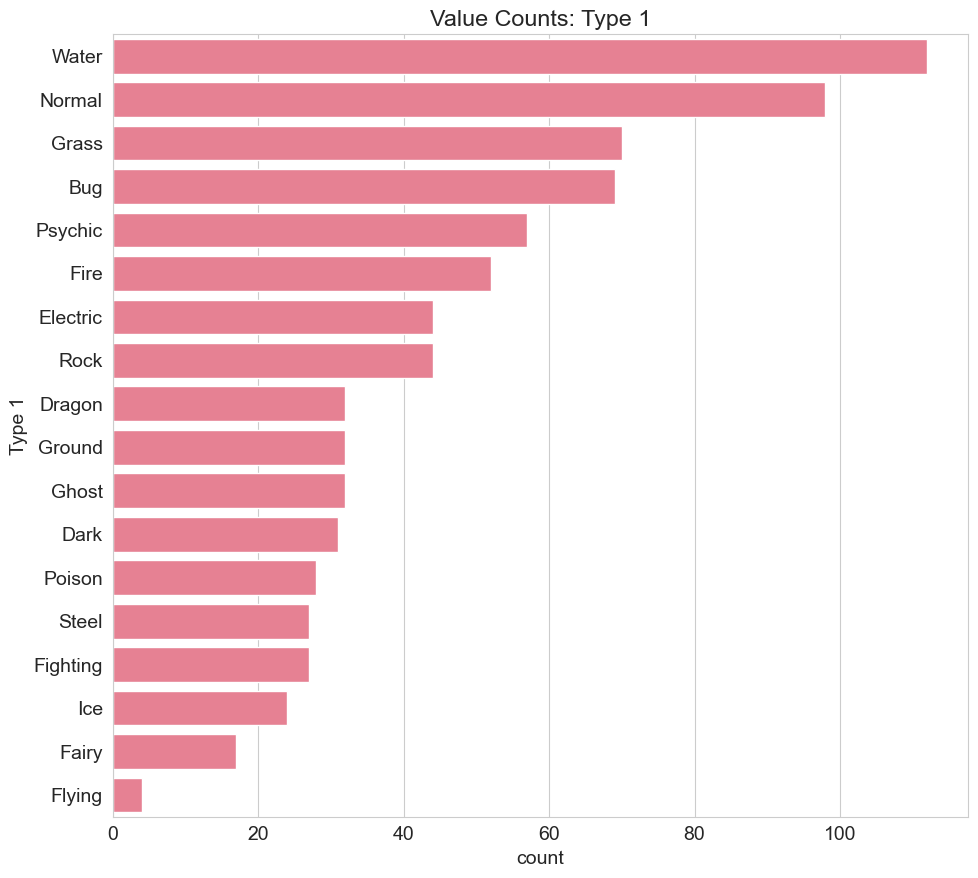


Type 2 - Unique Values: 18
Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18


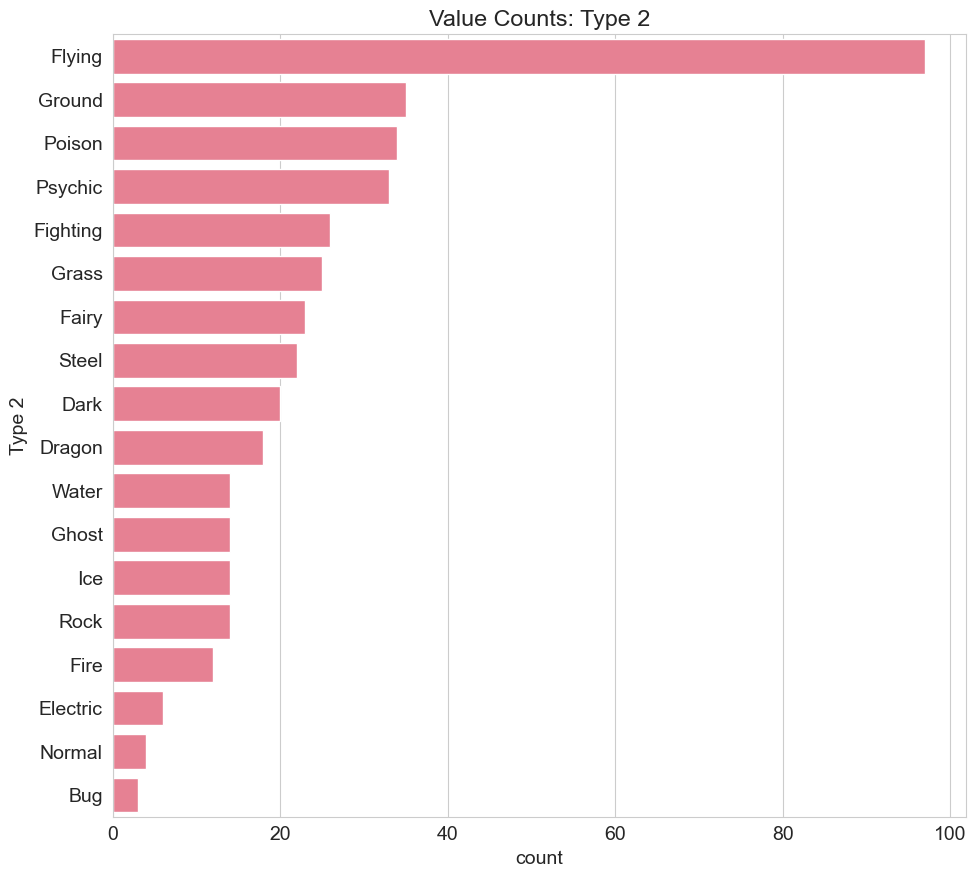

2025-07-23 02:15:22,515 - INFO - Data exploration completed


In [5]:
# Run EDA
explorer = DataExplorer()
explorer.explore_dataframe(df_raw, target='Legendary')

### Custom Analysis

<Figure size 1200x600 with 0 Axes>

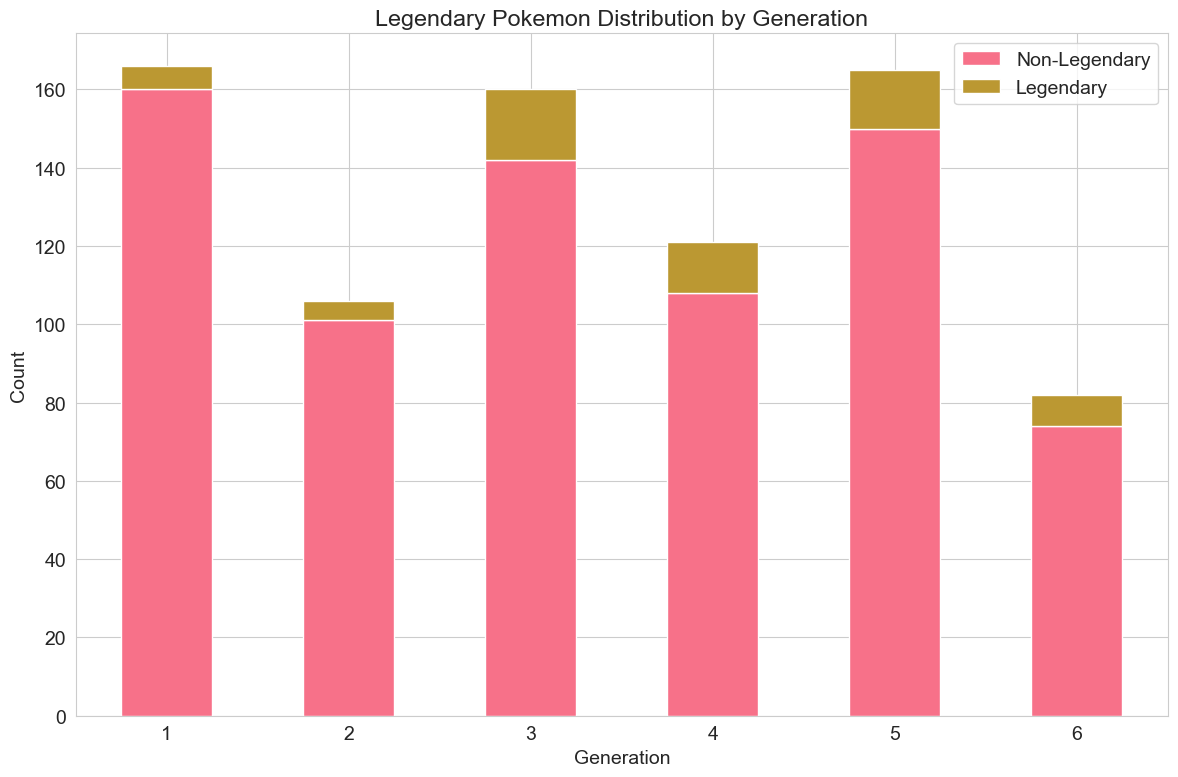

In [6]:
# Analyze legendary distribution by generation
if 'Generation' in df_raw.columns:
    plt.figure(figsize=(12, 6))
    legendary_by_gen = df_raw.groupby('Generation')['Legendary'].value_counts().unstack()
    legendary_by_gen.plot(kind='bar', stacked=True)
    plt.title('Legendary Pokemon Distribution by Generation')
    plt.xlabel('Generation')
    plt.ylabel('Count')
    plt.legend(['Non-Legendary', 'Legendary'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

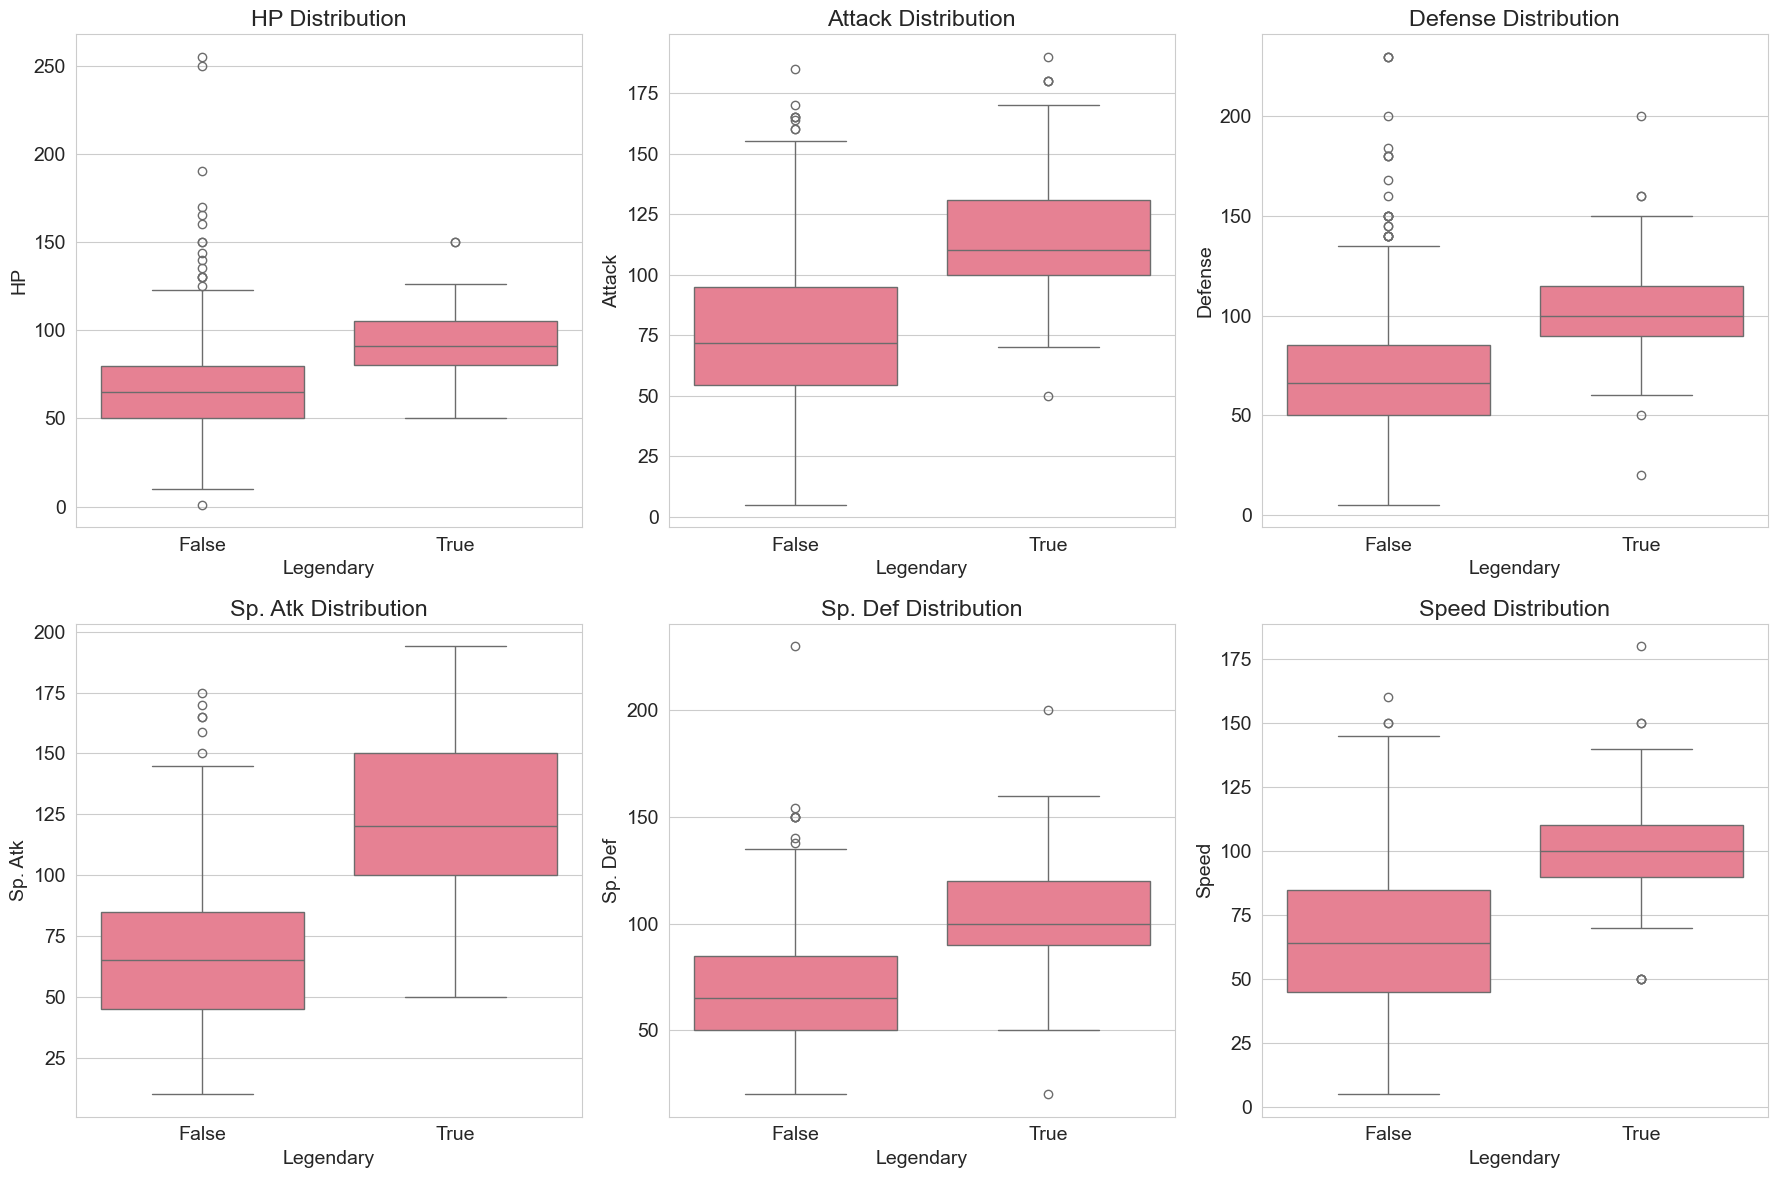

In [7]:
# Analyze stats distribution for legendary vs non-legendary
stat_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
available_stats = [col for col in stat_columns if col in df_raw.columns]

if available_stats:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, stat in enumerate(available_stats):
        sns.boxplot(data=df_raw, x='Legendary', y=stat, ax=axes[i])
        axes[i].set_title(f'{stat} Distribution')
    
    plt.tight_layout()
    plt.show()

## 4. Feature Engineering {#features}

In [8]:
# Initialize feature engineer
engineer = FeatureEngineer()

# Create enhanced features
df_enhanced = engineer.create_statistical_features(df_raw)
print(f"Statistical features created!")
print(f"Original columns: {len(df_raw.columns)}")
print(f"Enhanced columns: {len(df_enhanced.columns)}")
print(f"New features: {set(df_enhanced.columns) - set(df_raw.columns)}")

2025-07-23 02:15:23,537 - INFO - Creating statistical features
2025-07-23 02:15:23,542 - INFO - Created 7 statistical features


Statistical features created!
Original columns: 13
Enhanced columns: 20
New features: {'Attack_Defense_Ratio', 'Avg_Stats', 'Total_Stats', 'SpAtk_SpDef_Ratio', 'Offensive_Power', 'Off_Def_Ratio', 'Defensive_Power'}


In [9]:
# Prepare data for machine learning
X_train, X_test, y_train, y_test = engineer.prepare_pokemon_data(
    df_enhanced, 
    target_col='Legendary', 
    test_size=0.2, 
    random_state=42
)

print(f"Data prepared for ML!")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Feature columns: {list(X_train.columns)}")

2025-07-23 02:15:23,575 - INFO - Preparing Pokemon data for machine learning
2025-07-23 02:15:23,578 - INFO - Creating Pokemon type features
2025-07-23 02:15:23,588 - INFO - Created 18 type features
2025-07-23 02:15:23,595 - INFO - Data prepared: 800 samples, 33 features
2025-07-23 02:15:23,595 - INFO - Training set: 640 samples
2025-07-23 02:15:23,596 - INFO - Test set: 160 samples


Data prepared for ML!
Training set: (640, 33)
Test set: (160, 33)
Feature columns: ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Total_Stats', 'Avg_Stats', 'Attack_Defense_Ratio', 'SpAtk_SpDef_Ratio', 'Offensive_Power', 'Defensive_Power', 'Off_Def_Ratio', 'Fire', 'Grass', 'Fairy', 'Normal', 'Bug', 'Poison', 'Dark', 'Flying', 'Dragon', 'Psychic', 'Fighting', 'Ground', 'Ice', 'Water', 'Rock', 'Ghost', 'Steel', 'Electric']


## 5. Model Training {#training}

In [10]:
# Initialize model trainer
trainer = ModelTrainer()

# Train and evaluate all models
results_df = trainer.train_and_evaluate_models(X_train, X_test, y_train, y_test)

print("Model training completed!")
display(results_df.round(4))

2025-07-23 02:15:23,614 - INFO - Starting model training and evaluation
2025-07-23 02:15:23,615 - INFO - Training Logistic Regression
2025-07-23 02:15:25,821 - INFO - Training Decision Tree (Gini)
2025-07-23 02:15:25,862 - INFO - Training Decision Tree (Entropy)
2025-07-23 02:15:25,896 - INFO - Training K-NN
2025-07-23 02:15:25,899 - ERROR - Error training K-NN: 'Flags' object has no attribute 'c_contiguous'
2025-07-23 02:15:25,900 - INFO - Training Random Forest
2025-07-23 02:15:26,592 - INFO - Training Naive Bayes
2025-07-23 02:15:26,620 - INFO - Training SVC (Linear)
2025-07-23 02:15:29,145 - INFO - Training SVC (RBF)
2025-07-23 02:15:29,183 - INFO - Model training completed


Model training completed!


,Model,Accuracy,Precision,Recall,F1_Score,Cross_Val_Score
0,Logistic Regression,0.9188,0.9050,0.9188,0.9098,0.9531
1,Decision Tree (Gini),0.9625,0.9657,0.9625,0.9637,0.9406
2,Decision Tree (Entropy),0.9438,0.9555,0.9438,0.9478,0.9484
3,K-NN,NaN,NaN,NaN,NaN,NaN
4,Random Forest,0.9625,0.9657,0.9625,0.9637,0.9625
5,Naive Bayes,0.7562,0.8953,0.7562,0.8072,0.7719
6,SVC (Linear),0.9250,0.9199,0.9250,0.9221,0.9562
7,SVC (RBF),0.9312,0.9208,0.9312,0.9141,0.9453


2025-07-23 02:15:29,206 - INFO - Creating result visualizations


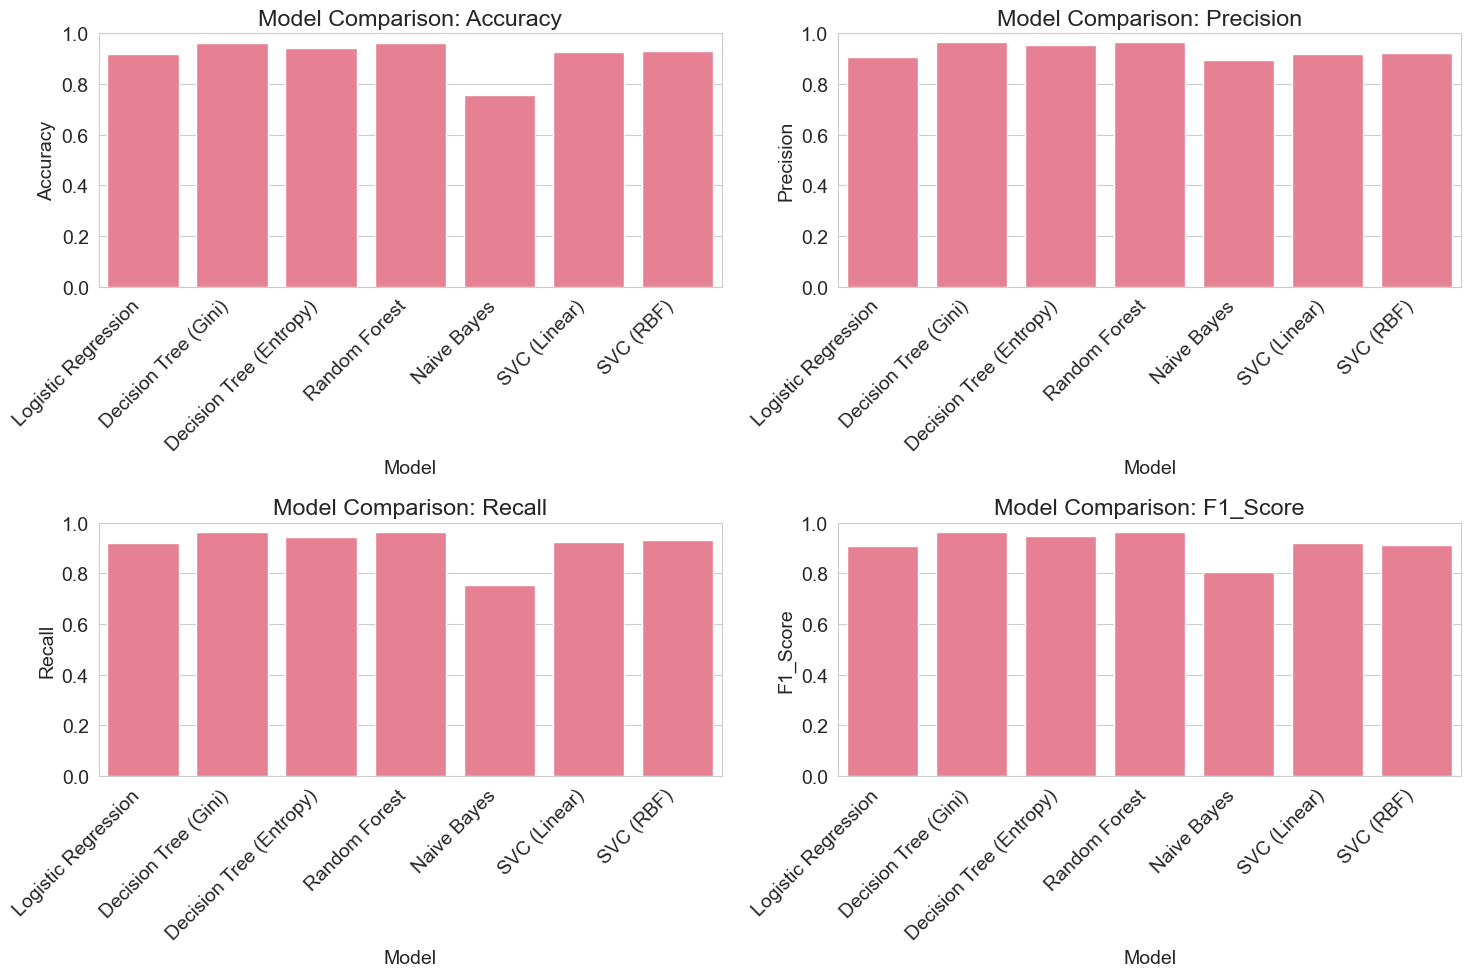


TOP PERFORMING MODELS
Best Accuracy: Decision Tree (Gini) (0.9625)
Best F1_Score: Decision Tree (Gini) (0.9637)


In [11]:
trainer.visualize_results(results_df)

In [12]:
# Optimize KNN hyperparameters
print("Optimizing KNN hyperparameters...")
best_knn_params = trainer.optimize_knn(X_train, y_train)
print(f"Best KNN parameters: {best_knn_params}")

2025-07-23 02:15:29,858 - INFO - Optimizing KNN hyperparameters


Optimizing KNN hyperparameters...


2025-07-23 02:15:33,532 - INFO - Best KNN parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 9}


Best KNN parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 9}


## 6. Results Analysis {#results}

Best performing model: Decision Tree (Gini)

CLASSIFICATION REPORT: Decision Tree (Gini)
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



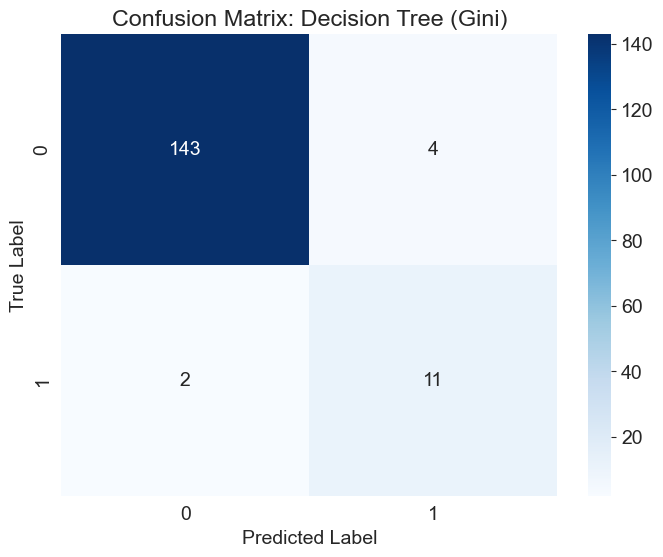

In [13]:
# Find best performing model
best_model_name = results_df.loc[results_df['F1_Score'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")

# Generate detailed classification report
trainer.generate_classification_report(X_test, y_test, best_model_name)

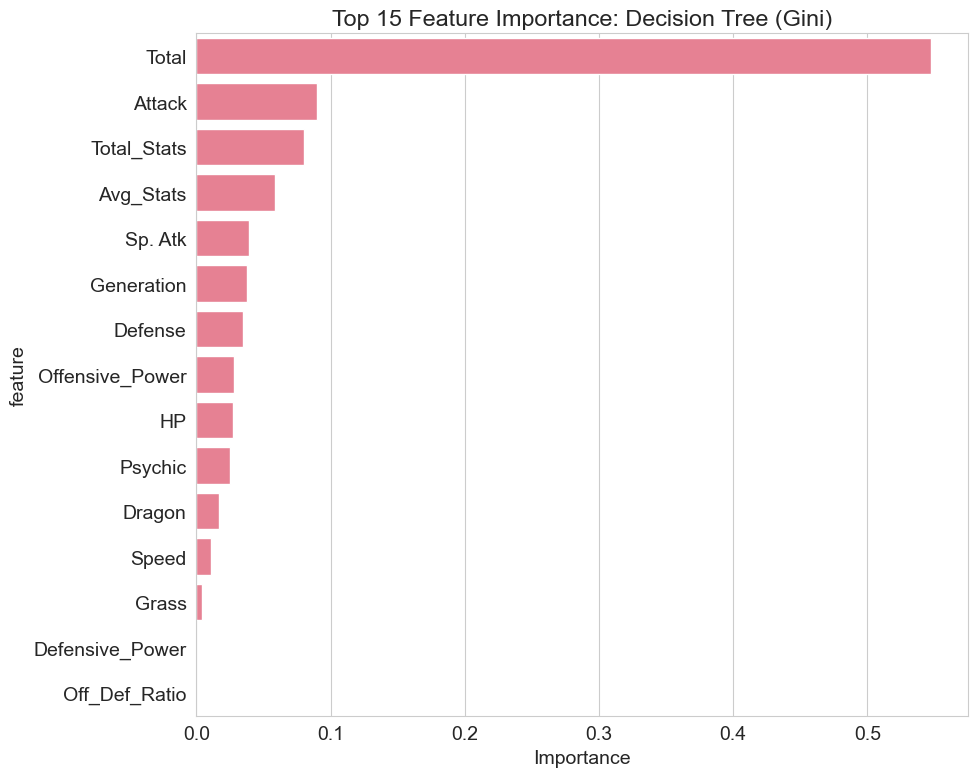


Top 10 Most Important Features (Decision Tree (Gini)):


,feature,importance
0,Total,0.547504
2,Attack,0.089702
8,Total_Stats,0.080068
9,Avg_Stats,0.058760
4,Sp. Atk,0.039037
7,Generation,0.037502
3,Defense,0.034886
12,Offensive_Power,0.028033
1,HP,0.027211
24,Psychic,0.025118


In [14]:
# Feature importance analysis (for tree-based models)
if 'Tree' in best_model_name or 'Forest' in best_model_name:
    feature_importance = trainer.get_feature_importance(best_model_name, X_train.columns.tolist())
    if not feature_importance.empty:
        print(f"\nTop 10 Most Important Features ({best_model_name}):")
        display(feature_importance.head(10))
else:
    print(f"Feature importance not available for {best_model_name}")

In [15]:
# Save results
output_path = "../outputs/notebook_results.csv"
Path("../outputs").mkdir(exist_ok=True)
results_df.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

Results saved to ../outputs/notebook_results.csv


## Summary

The above code demonstrated:
- Comprehensive exploratory data analysis of the Pokemon dataset
- Feature engineering including type encoding and statistical features
- Training and evaluation of multiple machine learning models
- Performance comparison and model selection
- Detailed analysis of the best performing model

The modular structure allows for easy experimentation and extension of the analysis pipeline.